In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

## Web Scraping

In [2]:
reviews=[]
for i in range(1,101):
    url="https://www.airlinequality.com/airline-reviews/british-airways/page/"+str(i)+"/"
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")
    revs=soup.findAll('div',attrs={'class':"text_content"})
    for r in revs:
        reviews.append(r)

In [3]:
len(reviews)

1000

In [4]:
rev=[]
for r in reviews:
    rev.append(r.text)   

In [5]:
rev[:20]

['Not Verified | Good domestic flight operated by BA Cityflyer. Ground service at check-in Edinburgh airport was particularly friendly and helpful. The flight departed on time and arrived earlier than scheduled. A complimentary drink and snack (albeit tiny!) were served. Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights.',
 'Not Verified | Failed at all basic travel fundamentals: 1) Our flight was delayed. 2) Staff demanded that we check in our carry on luggage even though we met our carry on allowance. The fact that we have a tight bus connection was totally ignored. 3) Staff were quite unpleasant.',
 "Not Verified |  They lost my baggage in a very simple situation. It's been three weeks and they don't care, no communication whatsoever. I was at the connection checkpoint at Heathrow 3hrs before my connecting flight, the last leg of my trip. An agent insists on checking in my hand luggage since my plane is full. And then

In [6]:
df=pd.DataFrame()

In [7]:
df['reviews']=rev

In [8]:
df.head(30)

,reviews
0,Not Verified | Good domestic flight operated b...
1,Not Verified | Failed at all basic travel fund...
2,Not Verified | They lost my baggage in a very...
3,✅ Trip Verified | Late boarding led to a one ...
4,✅ Trip Verified | As usual the flight is delay...
5,✅ Trip Verified | I had the most fantastic BA...
6,✅ Trip Verified | Couldn’t book in online. Ar...
7,✅ Trip Verified | London Heathrow to Mumbai in...
8,"✅ Trip Verified | Keflavík, Iceland to London ..."
9,✅ Trip Verified | Terrible Experience with Bri...


## Data preprocessing

In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words("english"))
stp_word=stop_words.copy()
stp_word.add('not')
stp_word.add('verified')
stp_word.add('trip')

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
word_lemmatizer = WordNetLemmatizer()

In [15]:
def data_preprocessig(text):
    text=re.sub(r"<.*?>", "", text)
    text=text.lower()
    text=re.sub(r"[^\w\s]", "", text)
    text_tokens=word_tokenize(text)
    filtered_text=[word_lemmatizer.lemmatize(w) for w in text_tokens if not w in stp_word]
    return " ".join(filtered_text)

In [16]:
df.reviews=df['reviews'].apply(data_preprocessig)

In [17]:
df.head()

,reviews
0,good domestic flight operated ba cityflyer gro...
1,failed basic travel fundamental 1 flight delay...
2,lost baggage simple situation three week dont ...
3,late boarding led one hour flight leaving two ...
4,usual flight delayed ba try blame someone inab...


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
def sentiment(text):
    if TextBlob(text).sentiment.polarity >= 0:
        return 'positive'
    elif TextBlob(text).sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [20]:
df['sentiment']=df['reviews'].apply(sentiment)

In [21]:
df.head()

,reviews,sentiment
0,good domestic flight operated ba cityflyer gro...,positive
1,failed basic travel fundamental 1 flight delay...,negative
2,lost baggage simple situation three week dont ...,positive
3,late boarding led one hour flight leaving two ...,negative
4,usual flight delayed ba try blame someone inab...,negative


## Data Analysis

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

<Axes: xlabel='sentiment', ylabel='count'>

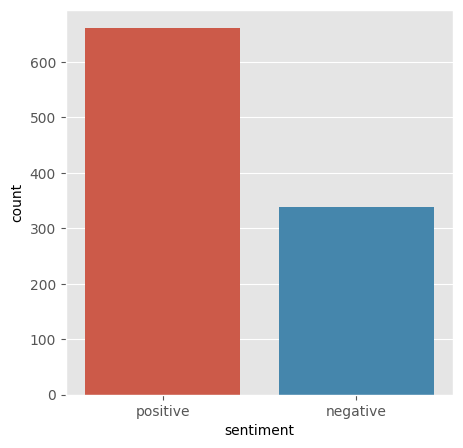

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=df)

In [27]:
df['sentiment'].value_counts()

positive    661
negative    339
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1b0b6fbf2e0>,
 [Text(-0.5329547602909542, 0.962267750412125, 'positive'),
  Text(0.5329547602909537, -0.9622677504121253, 'negative')],
 [Text(-0.29070259652233865, 0.5248733184066136, '66.10%'),
  Text(0.2907025965223384, -0.5248733184066138, '33.90%')])

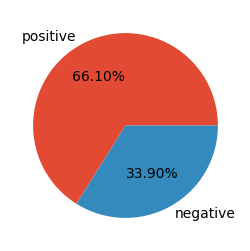

In [29]:
l1=[df['sentiment'].value_counts()[0],df['sentiment'].value_counts()[1]]
l2=['positive','negative']
plt.figure(figsize=(3,3))
plt.pie(l1,labels=l2,autopct='%1.2f%%')

In [30]:
pos_reviews = df[df.sentiment == 'positive']

In [31]:
pos_reviews.head()

,reviews,sentiment
0,good domestic flight operated ba cityflyer gro...,positive
2,lost baggage simple situation three week dont ...,positive
5,fantastic ba flight today cabin crew seat zone...,positive
6,couldnt book online arrived check find bumped ...,positive
7,london heathrow mumbai boeing 7878 business cl...,positive


In [32]:
from wordcloud import WordCloud

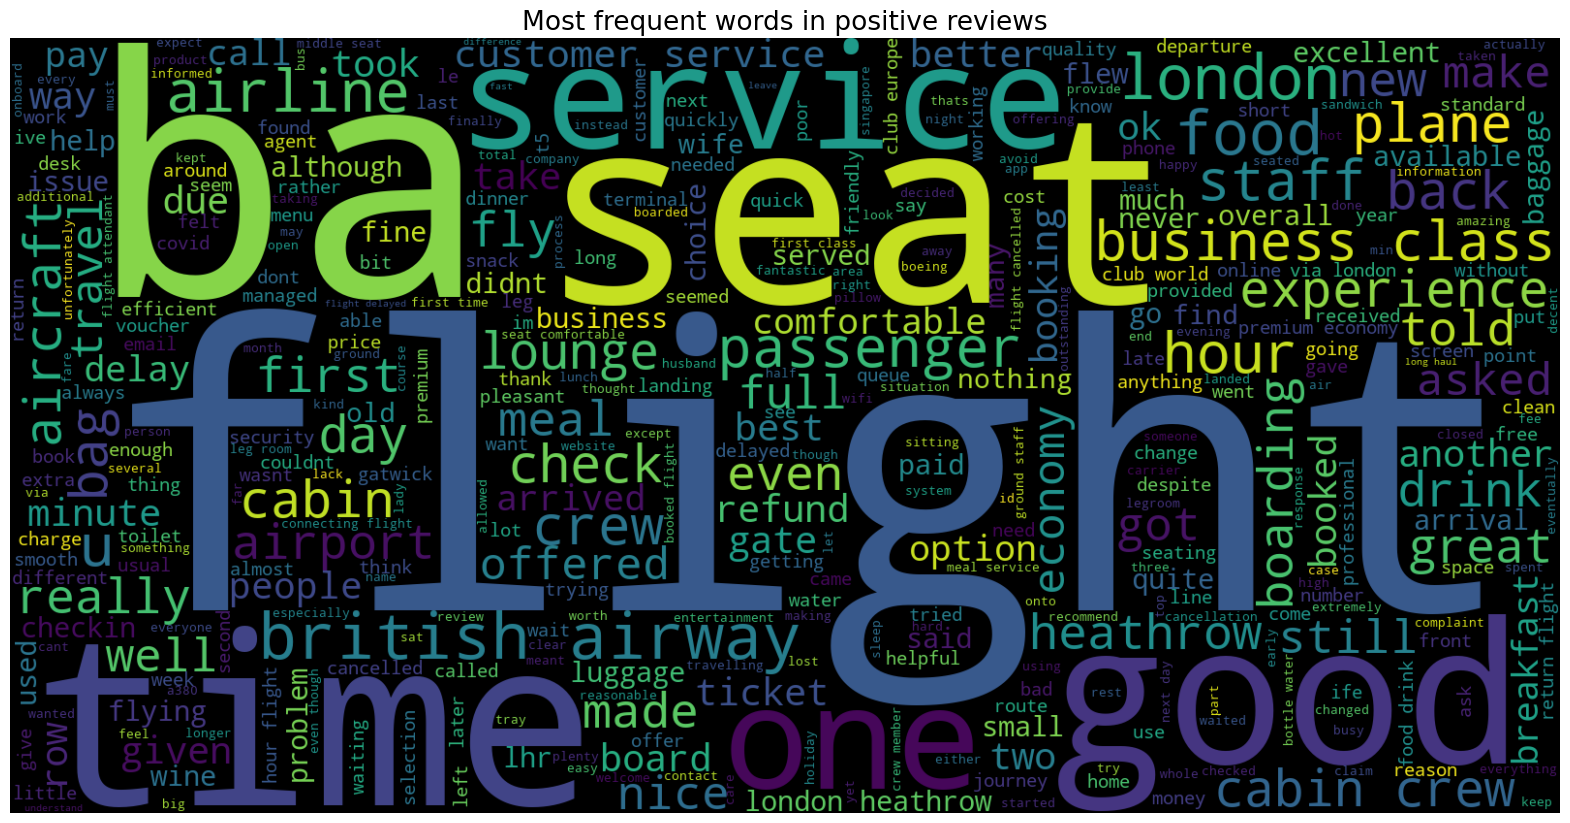

In [33]:
text = ' '.join([word for word in pos_reviews['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

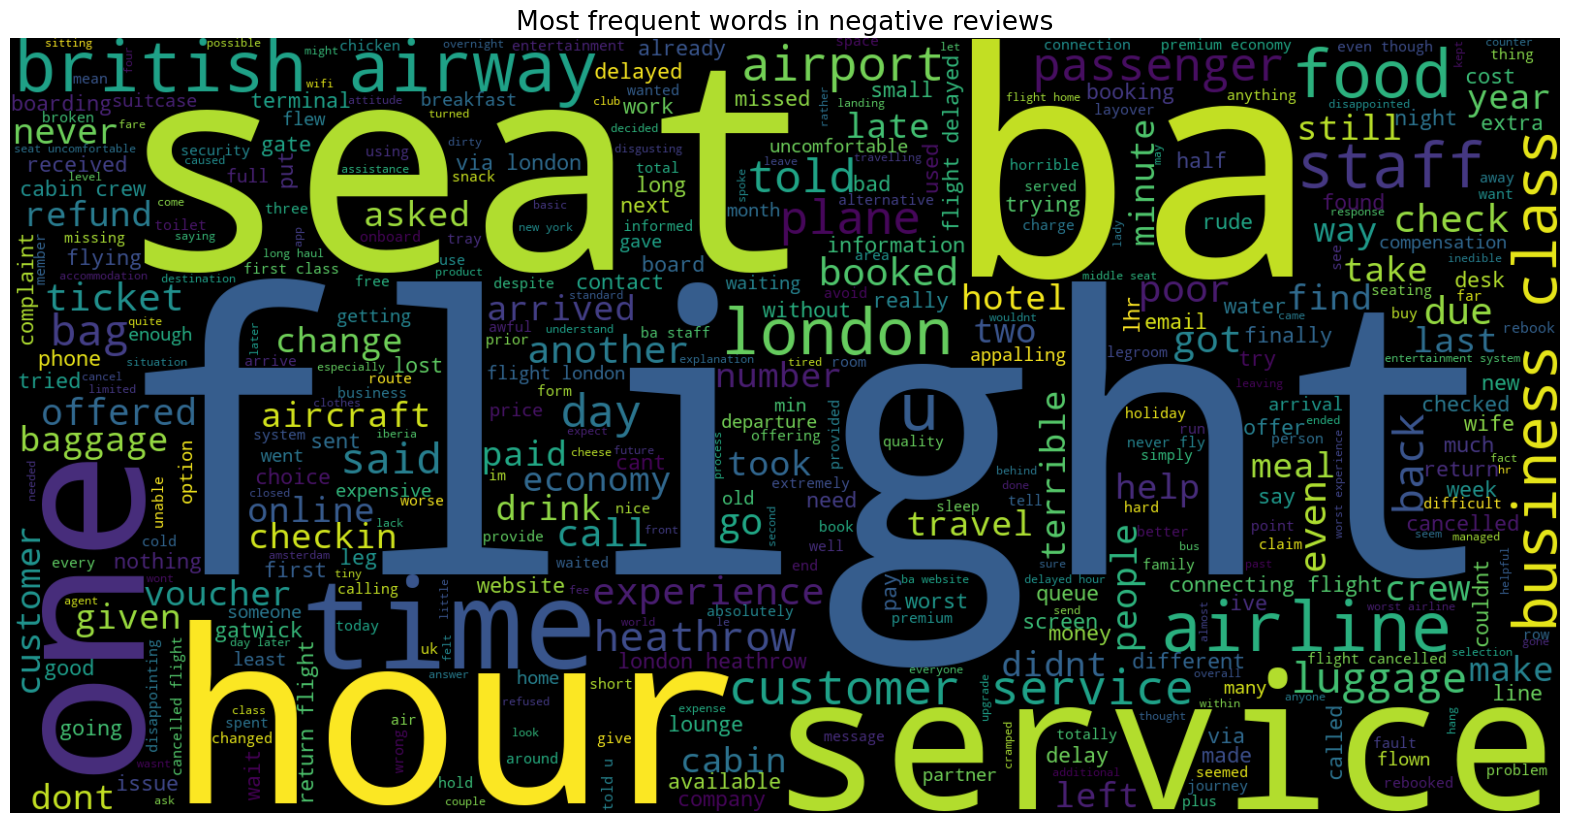

In [34]:
neg_reviews = df[df.sentiment == 'negative']
text = ' '.join([word for word in neg_reviews['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=400, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

## Building ML Models

In [35]:
df['sen']=df['sentiment'].map({'negative':0,'positive':1})

In [36]:
df.head()

,reviews,sentiment,sen
0,good domestic flight operated ba cityflyer gro...,positive,1
1,failed basic travel fundamental 1 flight delay...,negative,0
2,lost baggage simple situation three week dont ...,positive,1
3,late boarding led one hour flight leaving two ...,negative,0
4,usual flight delayed ba try blame someone inab...,negative,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["reviews"], df["sen"], test_size=0.2, random_state=42,stratify=df['sen'])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
nb=MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [70]:
from sklearn.metrics import classification_report

In [71]:
y_train_pred=nb.predict(X_train_vec)
y_test_pred=nb.predict(X_test_vec)
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       271
           1       0.98      0.96      0.97       529

    accuracy                           0.96       800
   macro avg       0.95      0.96      0.95       800
weighted avg       0.96      0.96      0.96       800

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        68
           1       0.78      0.80      0.79       132

    accuracy                           0.71       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.71      0.71      0.71       200



In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        68
           1       0.85      0.80      0.82       132

    accuracy                           0.77       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.78      0.77      0.77       200



In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred1 = rf.predict(X_test_vec)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50        68
           1       0.74      0.92      0.82       132

    accuracy                           0.74       200
   macro avg       0.73      0.65      0.66       200
weighted avg       0.74      0.74      0.71       200



- We have an imbalanced dataset. We will try oversampling to improve the performance of ML models.

## Oversampling with SMOTE

In [79]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_train1,y_train1=smote.fit_resample(X_train_vec, y_train)
y_train1.value_counts()

1    529
0    529
Name: sen, dtype: int64

In [81]:
nb1=MultinomialNB()
nb1.fit(X_train1,y_train1)
y_train_pred1=nb1.predict(X_train1)
y_test_pred1=nb1.predict(X_test_vec)
print(classification_report(y_train1,y_train_pred1))
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       529
           1       0.96      0.93      0.94       529

    accuracy                           0.94      1058
   macro avg       0.94      0.94      0.94      1058
weighted avg       0.94      0.94      0.94      1058

              precision    recall  f1-score   support

           0       0.57      0.69      0.63        68
           1       0.82      0.73      0.78       132

    accuracy                           0.72       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.74      0.72      0.73       200



In [82]:
nb2=LogisticRegression(max_iter=1000)
nb2.fit(X_train1,y_train1)
y_train_pred2=nb2.predict(X_train1)
y_test_pred2=nb2.predict(X_test_vec)
print(classification_report(y_train1,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       1.00      1.00      1.00       529

    accuracy                           1.00      1058
   macro avg       1.00      1.00      1.00      1058
weighted avg       1.00      1.00      1.00      1058

              precision    recall  f1-score   support

           0       0.62      0.82      0.71        68
           1       0.89      0.74      0.81       132

    accuracy                           0.77       200
   macro avg       0.76      0.78      0.76       200
weighted avg       0.80      0.77      0.78       200



In [84]:
nb3=RandomForestClassifier()
nb3.fit(X_train1,y_train1)
y_train_pred3=nb3.predict(X_train1)
y_test_pred3=nb3.predict(X_test_vec)
print(classification_report(y_train1,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       1.00      1.00      1.00       529

    accuracy                           1.00      1058
   macro avg       1.00      1.00      1.00      1058
weighted avg       1.00      1.00      1.00      1058

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        68
           1       0.81      0.81      0.81       132

    accuracy                           0.75       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.75      0.75      0.75       200



In [85]:
from sklearn.svm import LinearSVC

In [86]:
nb4=LinearSVC()
nb4.fit(X_train1,y_train1)
y_train_pred4=nb4.predict(X_train1)
y_test_pred4=nb4.predict(X_test_vec)
print(classification_report(y_train1,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       1.00      1.00      1.00       529

    accuracy                           1.00      1058
   macro avg       1.00      1.00      1.00      1058
weighted avg       1.00      1.00      1.00      1058

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        68
           1       0.86      0.76      0.81       132

    accuracy                           0.76       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.78      0.76      0.76       200



- Logistic regression has the best performance. We will use gridsearchcv to tune the hyperparmeters.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train1, y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [90]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [92]:
y_pred5=grid.predict(X_test_vec)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.62      0.81      0.71        68
           1       0.88      0.75      0.81       132

    accuracy                           0.77       200
   macro avg       0.75      0.78      0.76       200
weighted avg       0.80      0.77      0.78       200



- We have to collect more data to improve the performance of the model.